<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metoda Monte Carlo

Metoda Mote Carlo je metodou statistických pokusů. Je potřeba provést velké množství pokusů a tyto následně vyhodnotit. Pro přesnější výsledky je třeba větší množství pokusů. Přesnost výsledků je také závislá na přesnosti generování pokusů, neboli na náhodě. Toto platí speciálně v případě počítačů, kdy používáme tzv. pseudonáhodné generátory náhodných čísel. 

Tyto generátory náhodných čísel jsou ve skutečnosti algoritmy, které generují posloupnosti na základě matematických vztahů. Máme k dispozici generátory, jejichž vlastnosti odpovídají teoretickým předpokladům o generátorech náhodných čísel.

Generátory náhodných čísel v počítači jsou typicky generátory s rovnoměrným rozdělením na intervalu $<0;1>$. Generátory s odlišným rozdělením jsou realizovány s pomocí matematických transformací.

## Buffonova jehla

Převzato z https://github.com/SamuelHunter/Buffon/blob/master/buffon.py

http://pythonfiddle.com/buffons-needle-experiment/

Na podlaze jsou čáry ve vzálenosti $b$. Házíme na zem jehlu o délce $a$. Počítáme pokusy, kdy jehla padla na čáru.

$$\pi \approx \frac{2an}{bc}$$

kde $n$ je počet pokusů (hozených jehel) a $c$ je počet úspešných pokusů.


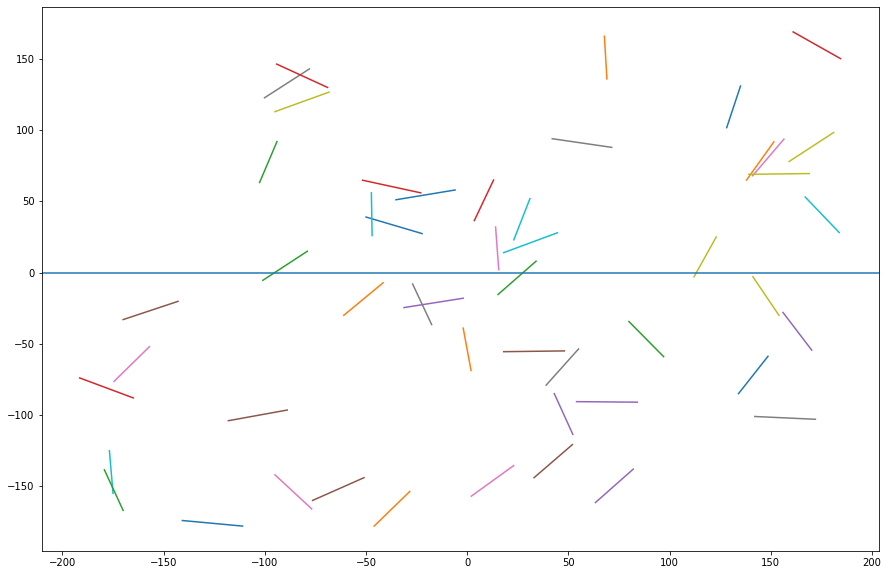

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
import random
from math import cos, sin, pi

def plotLine(sx, sy, ex, ey):
  plt.plot([sx, ex], [sy, ey])

#Estimating Pi using Buffon's Needle # www.101compiting.net/estimating-pi-using-buffons-needle

boardWidth = 40
needleLength = 30
numberOfNeedles = 50
    
y = 180
count = 0
for needle in range(0, numberOfNeedles):
  xs = random.randint(-180, 180)
  ys = random.randint(-180, 180)
  angle = random.random() * 2 * pi
  xe = xs + needleLength * cos(angle)
  ye = ys + needleLength * sin(angle)

  if (ys <= 0) and (ye >= 0):
    count = count + 1
  plotLine(xs, ys, xe, ye)
  
plt.axhline()


In [ ]:
'''
From Statistical Mechanics by Werner Krauth

Buffon's Needle Experiment
n = number of throws
r = number of runs
a = length of needle
b = distance between cracks
theta = angle needle makes to crack
rcenter = center of needles on floor
0  < theta < pi/2
0 < xcenter < b/2

nhits <===  number of hits of needle centered at x, with orientation theta
nhits = 1 if x < a/2 and abs(theta) < arcos(x/(a/2))
      = 0 otherwise
'''

import random
import math

def buffon(n, r, a, b):
    data=[]
    print('Buffon Needle Experiment (Google it) ')
    print('Runs\tNumber Hits\testimate of pi')
    for jj in range(r):
        nhits = 0
        for ii in range(n):
            xcent = random.uniform(0, b / 2.0)
            theta = random.uniform(0, math.pi/2)
            xtip  = xcent - (a / 2.0) * math.cos(theta)  #use of cosine not historically accurate
            if xtip < 0 :
                nhits += 1

        c = 2.0 * a * n
        d = b * nhits
        print(str(jj), '\t', str(nhits), '\t', str(c / d))
        data.append([jj,nhits])
    return data
        

r = 5
n = 1000000
a = 2  #needle 2 inches
b = 2  #cracks 2 inch spacing

hits= buffon(n, r, a, b)
print(math.pi)

Buffon Needle Experiment (Google it) 
Runs	Number Hits	estimate of pi
0 	 636126 	 3.1440312139418922
1 	 636143 	 3.143947194262925
2 	 636051 	 3.14440194261152
3 	 636517 	 3.1420998967820184
4 	 637088 	 3.1392837410216483
3.141592653589793


## Výpočet integrálu pod křivkou

Mějme útvar, jehož plochu známe (obdélník či čtverec například) a funkci $f$, jejíž integrál na intervalu $<x_s,x_e>$ hledáme a jejíž body na stejném intervalu patří do útvaru.

Generujeme náhodné body, které padří do útvaru v celkovém počtu $n$ a počítáme, kolik z těchto bodů ($c$) je pod křivkou, tedy

$$y \lt f(x)$$

Potom platí, že

$$\int_{x_s}^{x_e}f(x)dx \approx S \frac{c}{n}$$

In [ ]:
def plocha(f, xs, xe, ys, ye, c = 10000):
  xdelta = xe - xs
  ydelta = ye - ys

  count = 0
  for i in range(c):
    x = random.random() * xdelta + xs
    y = random.random() * ydelta + ys

    fv = f(x)
    if y < fv:
      count = count + 1
  return count / c * xdelta * ydelta


0.4638
0.4996


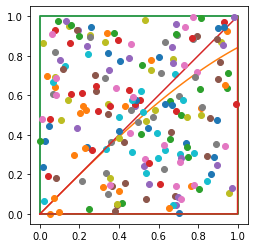

In [ ]:
import math

def plotIt(f, xs, xe, ys, ye, c = 100):
  xdelta = xe - xs
  ydelta = ye - ys

  plt.plot([xs, xe, xe, xs, xs], [ys, ys, ye, ye, ys])
  count = 0
  xx = []
  yy = []
  for i in range(101):
    x = i * xdelta / c + xs
    y = f(x)
    xx.append(x)
    yy.append(y)
  xx.append(x)
  yy.append(0)
  xx.append(0)
  yy.append(0)

  plt.plot(xx,yy)

  for i in range(c):
    x = random.random() * xdelta + xs
    y = random.random() * ydelta + ys
    plt.plot([x], [y], 'o')

  plt.grid(which = 'both')  
  plt.gca().set_aspect('equal')


def trojuhelnik(x):
  return x

plotIt(math.sin, 0, 1, 0, 1)
print(plocha(math.sin, 0, 1, 0, 1))

plotIt(trojuhelnik, 0, 1, 0, 1)
print(plocha(trojuhelnik, 0, 1, 0, 1))

In [ ]:
print(0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1)

0.7999999999999999


## Generování náhodných čísel

### Rovnoměrné rozdělení

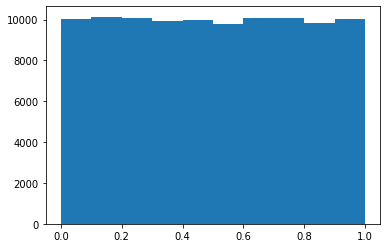

In [ ]:
def randomNumbers(count=10000):
  result = []
  for i in range(count):
    result.append(random.random())
  return result

plt.hist(randomNumbers(100000));

### Normální rozdělení

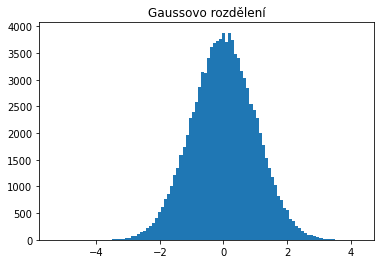

In [ ]:
def randomNumbersG(count=10000):
  result = []
  for i in range(count):
    result.append(random.gauss(0, 1))
  return result

plt.hist(randomNumbersG(100000), bins = 100);
plt.title('Gaussovo rozdělení');

### Exponenciální rozdělení

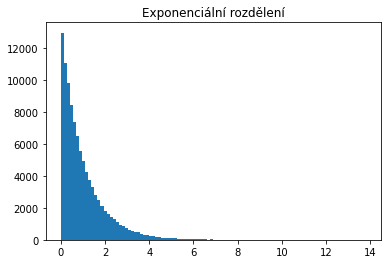

In [ ]:
def randomNumbersE(count=10000):
  result = []
  for i in range(count):
    result.append(random.expovariate(1))
  return result

plt.hist(randomNumbersE(100000), bins = 100);
plt.title('Exponenciální rozdělení');

### Rozdělení popsané funkcí

Jednou z dobře použitelných metod je metoda výběru. Předpokládáme, že hustota pravděpodobnosti je ohraničená na intervalu $(a,b)$. Potom lze použít následující algoritmus:
- vygenerujeme dvě náhodné veličiny (souřadnice bodu) s rovnoměrnou hustotou pravděpodobnosti
- otestujeme polohu bodu v obdélníku opsaném hustotě pravděpodobnosti požadované náhodné veličiny
- leží-li bod pod funkcí vyjadřující hustotu pravděpodobnosti, pak souřadnice x je hledaným náhodným číslem, v opačném případě provedeme generování znovu.

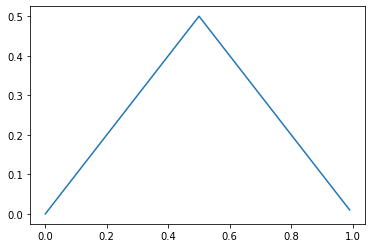

In [ ]:
import matplotlib.pyplot as plt

def hustotaPravdepodobnosti(x):
    if x < 0: 
        return 0
    if x > 1:
        return 0
    if x < 0.5:
        return x
    else:
        return 1 - x

yy = []
xx = []
for i in range(100):
    x = i / 100
    xx.append(x)
    y = hustotaPravdepodobnosti(x)
    yy.append(y)

plt.plot(xx, yy)

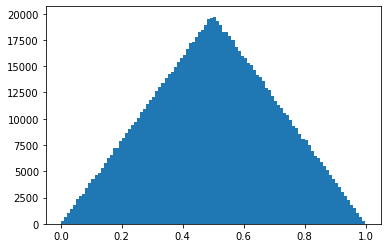

In [ ]:
import random

def generate():
    while True:
        x = random.random()
        y = random.random()
        if y < hustotaPravdepodobnosti(x):
            break
    return x

xx = []
for i in range(1000000):
    xx.append(generate())

plt.hist(xx, bins=100);

### Testování náhodných čísel

Text(0.5, 1.0, 'Náhodné body v rovině s rovnoměrným rozdělením')

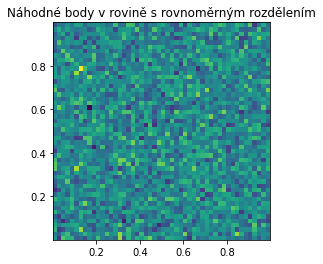

In [ ]:
def randomPoints(count = 10000):
  xx = []
  yy = []
  for i in range(count):
    xx.append(random.random())
    yy.append(random.random())
  return xx, yy

xx, yy = randomPoints(1000000)
plt.hist2d(xx, yy, 50);
plt.gca().set_aspect('equal')
plt.title('Náhodné body v rovině s rovnoměrným rozdělením')

Text(0.5, 1.0, 'Náhodné body v rovině s gausovým rozdělením')

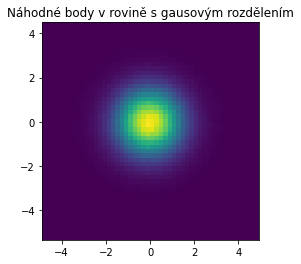

In [ ]:
def randomPointsG(count = 10000):
  xx = []
  yy = []
  for i in range(count):
    xx.append(random.gauss(0, 1))
    yy.append(random.gauss(0, 1))
  return xx, yy

xx, yy = randomPointsG(1000000)
plt.hist2d(xx, yy, 50);
plt.gca().set_aspect('equal')
plt.title('Náhodné body v rovině s gausovým rozdělením')

## Úloha

Navrhněte statistický model průzkumu úseku hraničního pásma s cílem zjistit optimální množství jednotek k jeho pokrytí. Hraniční pásmo uvažujte jako liniový objekt o definované délce. Předpokládejte, že pravděpodobnost jeho narušení má rovnoměrné rozdělení. Uvažujte s dosahem senzorů, které je významně menší než délka úseku hraničního pásma.

Popis jednoho experimentu:
- zjistit, zda bylo pásmu ubráněno
- tj. zachytíme cíl
- cíl je zachycen, jestliže vzdálenost cíle a jednotky je menší než dosah senzorů

Zcela náhodná pozice jednotky, bez ohledu na rozmístění ostatních jednotek

In [ ]:
def experiment(delka, dosah, pocet=1):
  cilX = random.random() * delka
  
  zachycen = False
  for i in range(pocet):
    jednotkaX = random.random() * delka
    zachycen = abs(jednotkaX - cilX) < dosah
    if zachycen:
      break
  return zachycen

Rovnoměrné rozmístění jednotek podle dosahu senzorů.

In [ ]:
def experiment2(delka, dosah, pocet=1):
  cilX = random.random() * delka
  
  zachycen = False
  for i in range(pocet):
    jednotkaX = random.random() * delka / pocet + i * delka / pocet
    zachycen = abs(jednotkaX - cilX) < dosah
    if zachycen:
      break
  return zachycen

Optimalizované rozmístění jednotek podle dosahu senzorů.

In [ ]:
def experiment3(delka, dosah, pocet=1):
  cilX = random.random() * delka
  
  zachycen = False
  for i in range(pocet):
    if dosah * 2 >= delka:
      jednotkaX = 0.5 * delka / pocet + i * delka / pocet
    # v ramci intervalu jednotka muze byt umistena na souradnicich
    # <dosah; delka-dosah>
    # <dosah + i * delka / pocet; (i + 1) * delka / pocet - dosah>
    # velikost je (i + 1) * delka / pocet - dosah - (dosah + i * delka / pocet)
    # (i + 1) * delka / pocet - dosah - dosah - i * delka / pocet
    # i * delka / pocet + delka / pocet - dosah - dosah - i * delka / pocet
    # delka / pocet - 2 * dosah
    else:
      jednotkaX = random.random() * (delka / pocet - 2 * dosah) + dosah + i * delka / pocet

    zachycen = abs(jednotkaX - cilX) < dosah
    if zachycen:
      break
  return zachycen

Statistické vyhodnocení experimentů

In [ ]:
def opakovanyExperiment(delka, dosah, pocetJednotek, experiment=experiment, pocetExperimentu=10000):
  zachyceno = 0
  for i in range(pocetExperimentu):
    if experiment(delka, dosah, pocetJednotek):
      zachyceno = zachyceno + 1
  return zachyceno/pocetExperimentu

print(opakovanyExperiment(1, 0.1, 5, experiment=experiment))
print(opakovanyExperiment(1, 0.1, 5, experiment=experiment2))
print(opakovanyExperiment(1, 0.1, 5, experiment=experiment3))

0.6485
0.8152
1.0


## Statistické hodnocení proměnných závislých na čase

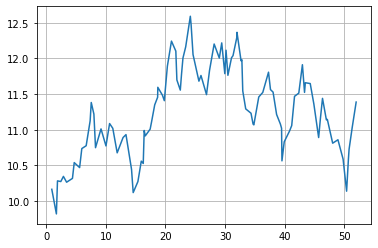

In [ ]:
import random
from matplotlib import pyplot as plt

value = 10
yy = []
xx = []
x = 0
for i in range(100):
    x = x + random.random()
    value = value + (random.random() - 0.5)
    yy.append(value)
    xx.append(x)

plt.plot(xx, yy)
plt.grid(which='both')

Jak se spočítá průměrná hodnota?

Jak se počítá průběžná průměrná hodnota?

Vzorec pro výpočet průměrné hodnoty závislé proměnné $y$ a nezávislé proměnné $x$.

$$\bar y = \frac{\sum_{\forall i} x_iy_i}{\sum_{\forall i} x_i}$$

Pokud se jedná o vývoj proměnné v čase (nezávislá proměnná je čas $t$), vzorec se přepisuje do tvaru

$$\bar y = \frac{\sum_{\forall i} \Delta t_iy_i}{\sum_{\forall i} \Delta t_i}$$

V případě simulace je nutné udělat dílčí sumarizaci

$$y_{i+1}^\sum = y_i^\sum + \Delta t_i y_i$$

$$t_{i+1}^\sum = t_i^\sum + \Delta t_i$$

díky sumarizaci je možné počítat (akumulovat) hodnoty čitatele a jmenovatele a určit aktuální průměrnou hodnot závislé proměnné, která je potom dána podílem akumulovaných hodnot

$$\bar y_i = \frac{y_i^\sum}{t_i^\sum}$$


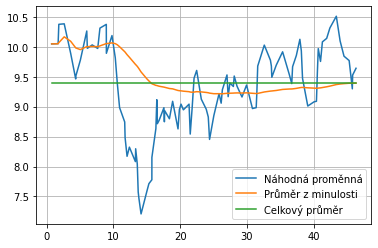

In [ ]:
import random
from matplotlib import pyplot as plt

value = 10
yy = [] # vyvoj nahodne promenne
xx = [] # okamziky
x = 0
ySum = 0 # sumarizace nahodne promenne
tSum = 0 # sumarizace casu
yAvg = [] # vyvoj prumeru nahodne promenne

for i in range(100):
    deltaX = random.random() 
    x = x + deltaX
    value = value + (random.random() - 0.5)
    yy.append(value)
    xx.append(x)

    ySum = ySum + value * deltaX
    tSum = tSum + deltaX
    yAvg.append(ySum / tSum)

plt.plot(xx, yy, label='Náhodná proměnná')
plt.plot(xx, yAvg, label='Průměr z minulosti')
plt.plot(xx, [yAvg[-1]]*len(xx), label='Celkový průměr')
plt.grid(which='both')
plt.legend()

## Statistické hodnocení logických proměnných závislých na čase

[True, True, False, True, False]


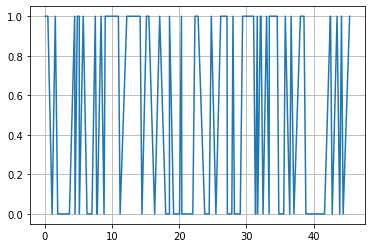

In [ ]:
import random
from matplotlib import pyplot as plt

value = 10
yy = []
tt = []
t = 0
for i in range(100):
    t = t + random.random()
    value = random.random() > 0.5
    yy.append(value)
    tt.append(t)

plt.plot(tt, yy)
plt.grid(which='both')
print(yy[0:5])

Logická náhodná proměnná nabývá hodnot `True` a `False`. Po převodu těchto hodnot na čísla `1` a `0` můžeme na výpočet průměrných hodnot využít dříve uvedené vzorce.

[True, True, True, False, True]



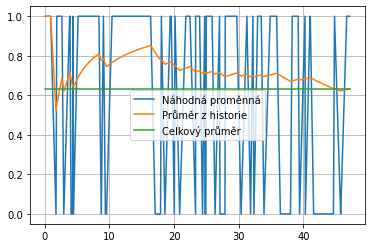

In [ ]:
import random
from matplotlib import pyplot as plt

value = 10
yy = []
tt = []
t = 0
yAvg = []
ySum = 0
tSum = 0
for i in range(100):
    deltaT = random.random()
    t = t + deltaT
    value = random.random() > 0.5
    yy.append(value)
    tt.append(t)

    ySum = ySum + value * deltaT
    tSum = tSum + deltaT
    yAvg.append(ySum / tSum)

plt.plot(tt, yy, label='Náhodná proměnná')
plt.plot(tt, yAvg, label='Průměr z historie')
plt.plot(tt, [yAvg[-1]]*len(xx), label='Celkový průměr')
plt.grid(which='both')
plt.legend()
print(yy[0:5])
print()

## Statistické stanovení pravděpodobnosti výroku

[True, True, True, True, False]


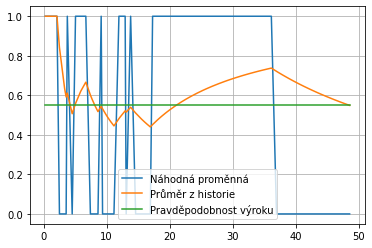

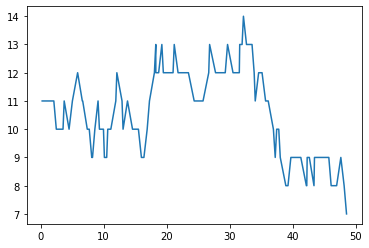

In [ ]:
import random
from matplotlib import pyplot as plt

def vyrok(value):
    return value > 10


t = 0 # cas
tt = [] # okamziky
value = 10 # velicina
vv = [] # vyvoj veliciny

yy = [] # vyvoj vyroku

yAvg = [] # vyvoj prumeru / pravdepodobnosti
ySum = 0
tSum = 0

for i in range(100):
    deltaT = random.random() 
    t = t + deltaT
    tt.append(t)
    
    # vyvoj veliciny
    r = random.random()
    if r < 0.25:
        delta = -1
    elif r > 0.75:
        delta = 1
    else:
        delta = 0
    value = value + delta
    vv.append(value)

    # vyvoj vyroku
    hodnotaVyroku = vyrok(value)
    yy.append(hodnotaVyroku)

    # sumarizace
    ySum = ySum + hodnotaVyroku * deltaT
    tSum = tSum + deltaT
    yAvg.append(ySum / tSum)

plt.plot(tt, yy, label='Náhodná proměnná')
plt.plot(tt, yAvg, label='Průměr z historie')
plt.plot(tt, [yAvg[-1]]*len(xx), label='Pravděpodobnost výroku')
plt.grid(which='both')
plt.legend()
print(yy[0:5])
plt.show()
plt.plot(tt, vv)
plt.show()

## Přesnost metody Monte Carlo

$$n \le \frac{1}{4 \epsilon^2 \cdot \alpha} $$

kde $n$ je počet pokusů $\epsilon$ je chyba a $\alpha$ je hladina významnosti.

## Problém Monty Hall 

Zuzana Hrnčiarová, Metoda Monte Carlo a její realizace, diplomová práce, Masarykova univerzita, Brno, 2015

Inspirace televizní soutěží Let's make a deal. Troje dveře, výhra podle vybraných dveří. Při označení dveří moderátor otevře jiné, kde není hlavní výhra, a vyzve soutěžícího, zda nechce změnit své rozhodnutí. Po finálním výběru soutěžící dostává výhru.

Hra je definována strukturou
```python
{
  '0': 'none',
  '1': 'none',
  '2': 'main'
}
```
kde `'none'` je vedlejší výhra a `'main'` je hlavní výhra.

In [ ]:
import random

def createGame():
    game = {
        '0': 'none',
        '1': 'none',
        '2': 'none'}

    r = random.choice(list(game.keys()))
    game[r] = 'main'

    return game

První krok je realizován podle strategie, které mají "kumulativní" pravděpodobnosti.

In [ ]:
import random

def step1(game, strategy):
    r = random.random()
    if r < strategy['0']:
        choice = '0'
    elif r < strategy['1']:
        choice = '1'
    else:
        choice = '2'
    
    return choice

U druhého kroku dojde k eliminaci prvku, který vybral hráč. Jestliže hráč vybral hlavní výhru, je rovnoměrně náhodně proveden výběr ze zbývajících možností. Jestliže hráč nevybral hlavní výhru, je proveden výběr možnosti, která není hlavní výhrou.

In [ ]:
import random

def step2(game, choice):
    subGame = {**game}
    del subGame[choice]
    if game[choice] == 'main':
        r = random.random()
        subGameKeys = list(subGame.keys())
        if r < 0.5:
            openChoice = subGameKeys[0]
        else:
            openChoice = subGameKeys[1]
    else:
        for key, value in subGame.items():
            if value == 'main':
                continue
            openChoice = key
            break
        
    return openChoice

V kroku třetím je podle strategie provedena buď změna volby nebo hráč trvá na svém výběru. `strategy['0']` je pravděpodobnost změny.

In [ ]:
import random

def step3(game, choice, openChoice, strategy):
    r = random.random()
    if r < strategy['0']:
        return choice
    else:
        for key, value in game.items():
            if key == choice:
                continue
            if key == openChoice:
                continue
            result = key
        return result

Kompletní jedna hra.

In [ ]:
def play(
    strategy1 = {'0': 0.333333, '1': 0.66666, '2': 1}, 
    strategy2 = {'0': 0.5, '1': 1}):
  
    game = createGame()
    playerChoice = step1(game, strategy1)
    whoKnowChoice = step2(game, playerChoice)
    finalChoice = step3(game, playerChoice, whoKnowChoice, strategy2)
    return game[finalChoice]


Statistické vyhodnocení více běhů jedné hry.

In [ ]:
def multiPlays(
    strategy1 = {'0': 0.333333, '1': 0.66666, '2': 1}, 
    strategy2 = {'0': 0.5, '1': 1},
    count = 1000000):
  
    counter = {'none': 0, 'main': 0}
    for i in range(count):
        item = play(strategy1, strategy2)
        counter[item] = counter[item] + 1
    return counter

Vyhodnocení daných strategií

In [ ]:
strategy1 = {'0': 0.333333, '1': 0.66666, '2': 1}
strategies2 = [
    {'0': 1, '1': 1},
    {'0': 0.5, '1': 1},
    {'0': 0, '1': 1},
    ]

for item in strategies2:
    statistic = multiPlays(strategy1, item)
    print(item, '\t', statistic)

{'0': 1, '1': 1} 	 {'none': 666232, 'main': 333768}
{'0': 0.5, '1': 1} 	 {'none': 500729, 'main': 499271}
{'0': 0, '1': 1} 	 {'none': 333826, 'main': 666174}


Vykreslení průběhu pravděpodobnosti výhry.

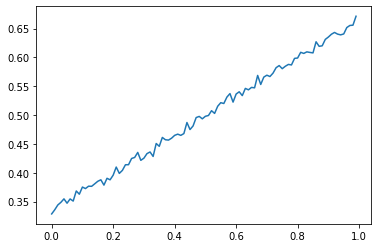

In [ ]:
import random
from matplotlib import pyplot as plt

xx = []
yy = []
rcount = 100
for i in range(rcount):
    probability = i / rcount
    strategy = {'0': 1 - probability}
    xx.append(probability)
    statistic = multiPlays(strategy2=strategy, count=10000)
    result = statistic['main'] / (statistic['main'] + statistic['none'])
    yy.append(result)

plt.plot(xx, yy)

## Nálet

In [ ]:
# instalace knihovny simodes
!pip install simodes

In [ ]:
import simodes
from simodes import Simulator

In [ ]:
import random

def randomG(low=0, high=1):
    sum = 0
    count = 3
    for i in range(count):
        sum = sum + (high - low) * random.random() + low
    return sum / count

In [ ]:
def generujVzdalenostDetekce():
    #return 40000
    return randomG(30000, 50000)

def generujCasStrelby():
    #return 5
    return randomG()

def generujDobuLetuRakety():
    return 37

def generujCasOdpaluZLetounu():
    return 10

def generujDobuLetuRaketyZLetounu():
    return 20

In [ ]:
def vzletLetounu(time, sim, letoun):
    letounData = {**letoun, 'vzlet': time}

    rychlost = letoun['rychlost']
    vzdalenostKCili = letoun['cilA']
    casDetekceLetounu = time + 
        (vzdalenostKCili - generujVzdalenostDetekce()) / rychlost
    #planuj(casDetekceLetounu, detekceLetounu)
    sim.AddEvent(casDetekceLetounu, detekceLetounu, letoun=letounData)
    pass

def detekceLetounu(time, sim, letoun):
    letounData = {**letoun, 'detekceA': time}
    
    casOdpalu = time + generujCasStrelby()
    planuj(casOdpalu, odpalRakety)
    pass

def odpalRakety(time, sim, letoun):
    casNiceni = time + generujDobuLetuRakety()
    planuj(casNiceni, niceniCile)
    pass

def niceniCile(time, sim, letoun):
    cilZnicen = random() < pravdepodobnostZniceni
    if not cilZnicen:
        casOdpalu = time + generujCasOdpaluZLetounu()
        planuj(casOdpalu, odpalRaketyLetounem)
    pass

def odpalRaketyLetounem(time, sim, letoun):
    casDopaduRakety = time + generujDobuLetuRaketyZLetounu()
    planuj(casDopaduRakety, niceniObjektu)
    pass

def niceniObjektu(time, sim, letoun):
    objektZnicen = random() < pravdepodobnostZniceniObjektu
    if objektZnicen:
        pass
    # letoun leti dal
    pass


In [ ]:
sim = Simulator()              # inicializace simulace
currentState = sim.GetState()  # získání aktuálního stavu simulace
print(currentState)            # výpis aktuálního stavu simulace

In [ ]:
letoun = {'rychlost': 250, 'prvniCil': 50000}
sim.AddEvent(0, vzletLetounu, sim=sim, letoun=letoun);

## Materiály

> **Povinně volitelná videa**
> 
> [Monte Carlo Methods : Data Science Basics 19 minut](https://www.youtube.com/watch?v=EaR3C4e600k)
>
> [MIT kurz 50 minut](https://www.youtube.com/watch?v=OgO1gpXSUzU)